## Practical Work 2

For this practical work, the trainees will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.
##### Please notice that we will apply these algorithm to single variable LR.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.metrics import r2_score

To have a dataset or set of data points, the trainee must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [2]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [3]:
X.shape

(50,)

In [4]:
a=-2
b=1
y=a*X+b
y

array([  1.        ,   0.18367347,  -0.63265306,  -1.44897959,
        -2.26530612,  -3.08163265,  -3.89795918,  -4.71428571,
        -5.53061224,  -6.34693878,  -7.16326531,  -7.97959184,
        -8.79591837,  -9.6122449 , -10.42857143, -11.24489796,
       -12.06122449, -12.87755102, -13.69387755, -14.51020408,
       -15.32653061, -16.14285714, -16.95918367, -17.7755102 ,
       -18.59183673, -19.40816327, -20.2244898 , -21.04081633,
       -21.85714286, -22.67346939, -23.48979592, -24.30612245,
       -25.12244898, -25.93877551, -26.75510204, -27.57142857,
       -28.3877551 , -29.20408163, -30.02040816, -30.83673469,
       -31.65306122, -32.46938776, -33.28571429, -34.10204082,
       -34.91836735, -35.73469388, -36.55102041, -37.36734694,
       -38.18367347, -39.        ])

### Plot X vs. y

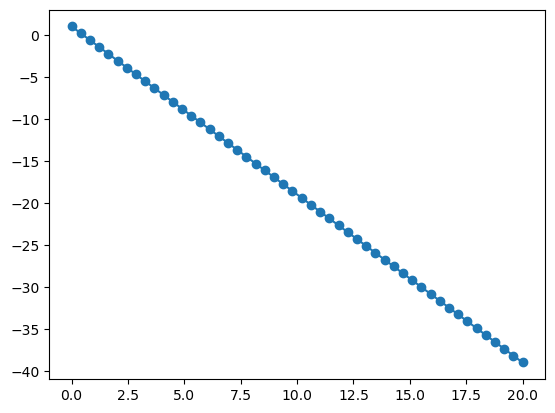

In [6]:
plt.plot(X, y, '-o')

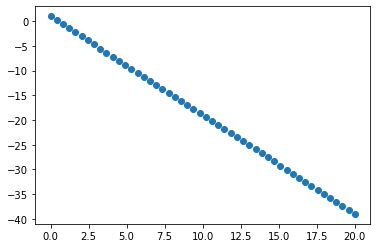

In [29]:
def plotting(loss, thetas0, thetas1, data, target):
    
    plt.plot(loss, '.-')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()
    
    plt.plot(thetas0, loss, '.-')
    plt.xlabel("Theta 0")
    plt.ylabel("Loss")
    plt.show()
    
    plt.plot(thetas1, loss, '.-')
    plt.xlabel("Theta 1")
    plt.ylabel("Loss")
    plt.show()
        
    plt.plot(data, target, '.-')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Implement the stop criteria (Gradient Check).
#### Implement the convergence check (cost check).
#### You can use any small values for stop criteria and convergence check. However, the used values in the current implementation used 0.001 for both.

In [34]:

def gd_singular(X, y, alpha, itr):
    
    th0 = 0
    th1 = 0
    loss = []
    thetas_0 = []
    thetas_1 = []
    itrs = []
    threshold = 0.1
    
    for i in range(itr):
    
        itrs.append(i)

        h = th0 + th1*X
        e = (h - y)
        j = 1/(2*len(X))*(e@e).sum()

        loss.append(j)
        thetas_0.append(th0)
        thetas_1.append(th1)

        #grdient
        j_theta_0 = 1/(len(X))*(e.sum())
        j_theta_1 = 1/(len(X))*(e@X).sum()

        gradient_vec = np.array([[j_theta_0],[j_theta_1]])
        norm = np.linalg.norm(gradient_vec)

        if (norm < threshold):
            break

        else:
            th0 = th0 - alpha*j_theta_0
            th1 = th1 - alpha*j_theta_1
            
    print("******* Training Report *********\n")
    print(f'Gradient Descent converged after {i+1} iterations\n')
    print('Cost=',j,'\n')
    print('Gradient Vector',gradient_vec,'\n')
    print('Gradient Vector Norm:',norm,'\n')
    print(f'Optimal theta_0: {th0}\noptimal theta_1: {th1}')        
        
    return th0, th1, h, thetas_0, thetas_1, loss
            

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [25]:
th0, th1, h, thetas_0, thetas_1, loss = gd_singular(X, y, alpha=0.0005, itr=300)

#### Calculate r2 score

In [13]:
y_pred = th0 + th1*X
print("r2 score = ", r2_score(y, y_pred))

r2 score =  0.9977566779928114


r2_score: 0.9975395965150151


##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

#### Plot loss vs. epochs

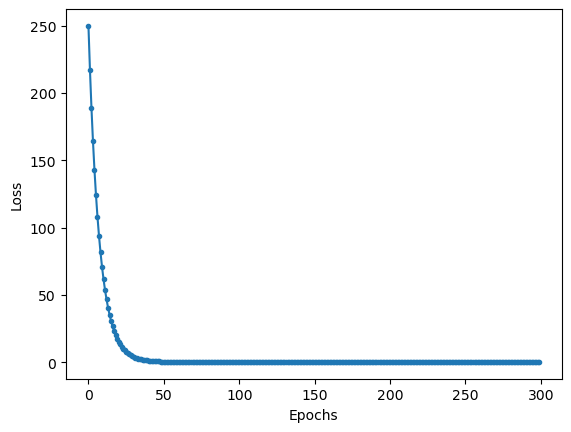

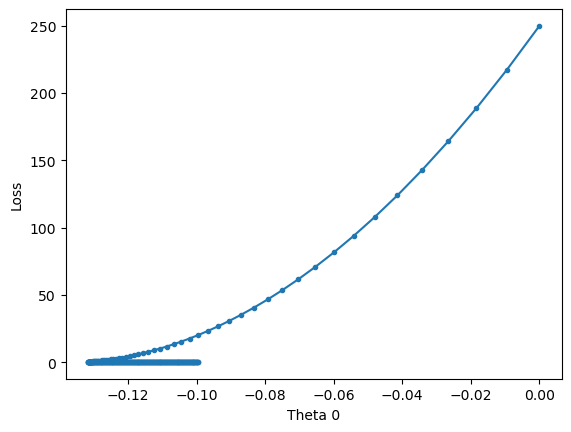

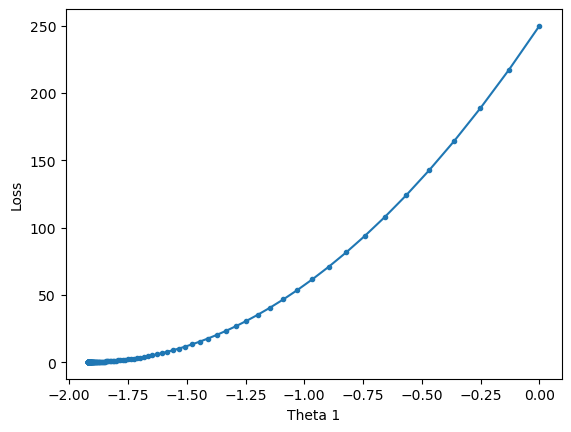

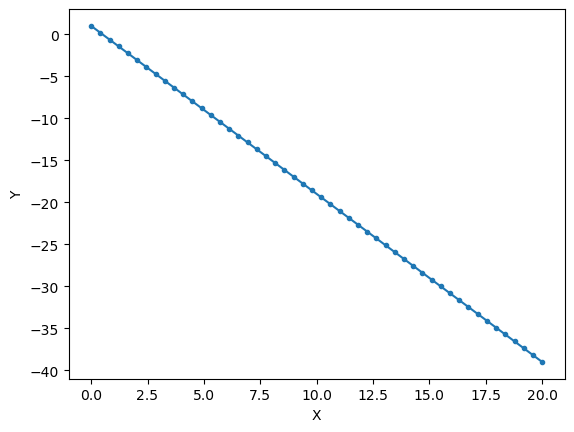

In [30]:
plotting(loss, thetas_0, thetas_1, X, y)

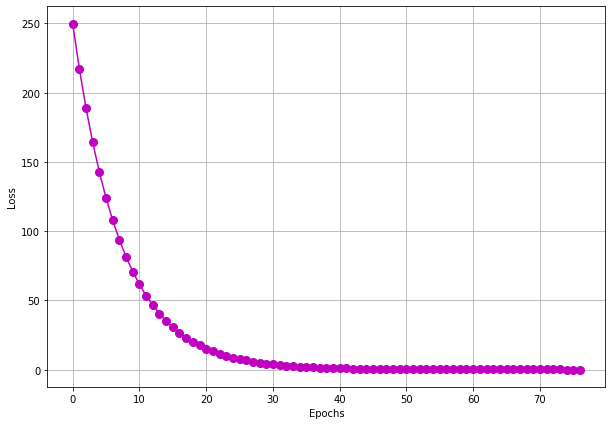

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

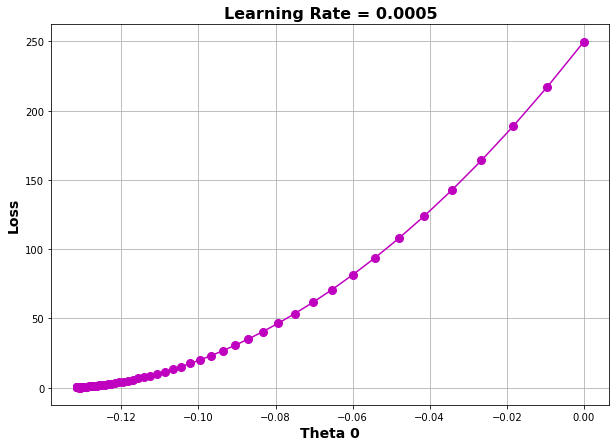

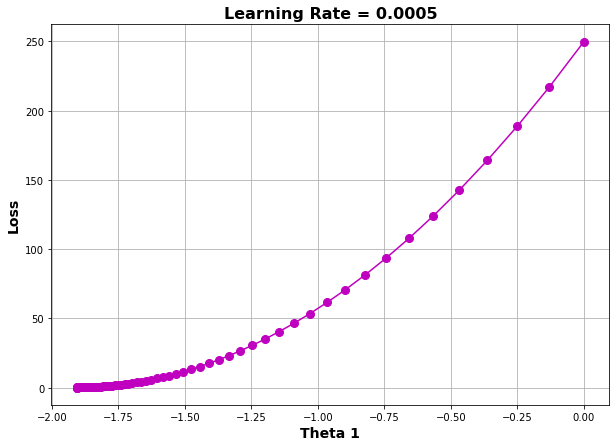

#### Plot all regression lines till converge

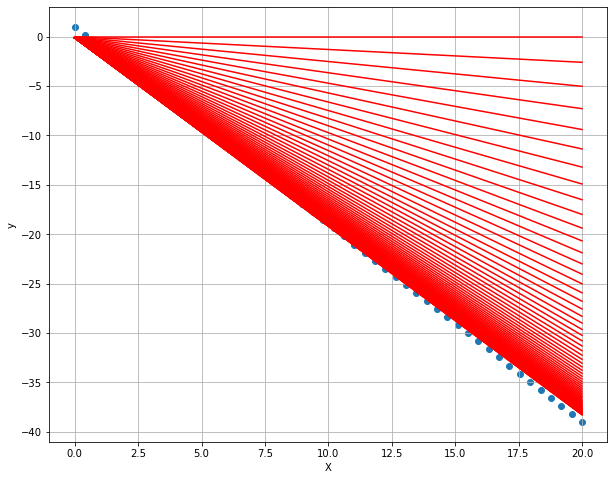

#### Plot the best regression line

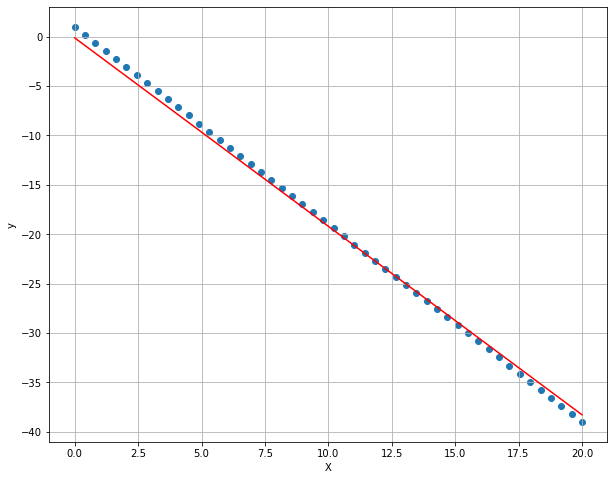

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

##### The following results uses alpha = 0.00005 and max. iterations = 1000.

In [31]:
th0, th1, h, thetas_0, thetas_1, loss = gd_singular(X, y, alpha=0.00005, itr=1000)

In [32]:
y_pred = th0 + th1*X
print("r2 score = ", r2_score(y, y_pred))

r2 score =  0.9976342313674937


r2_score: 0.9965793400861428


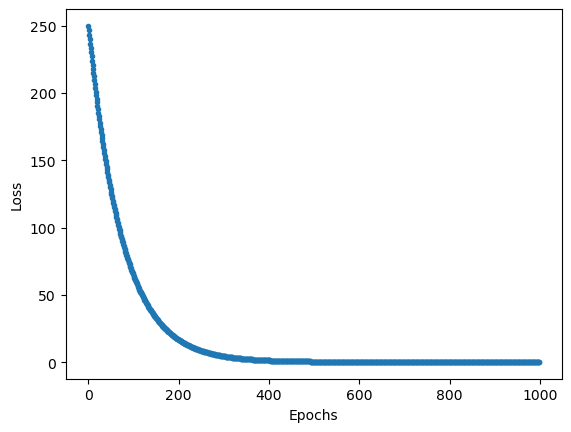

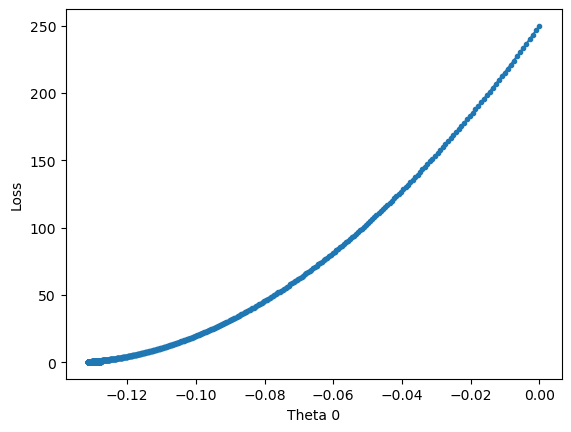

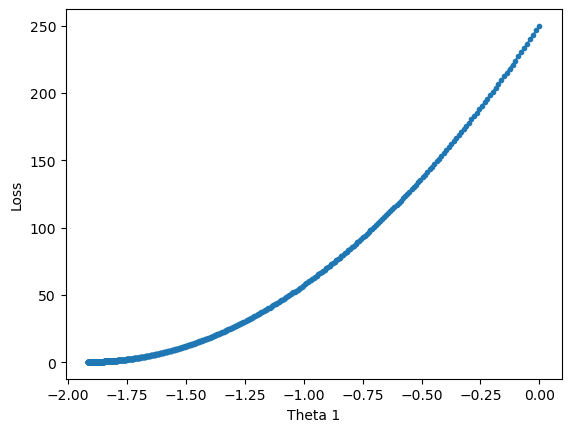

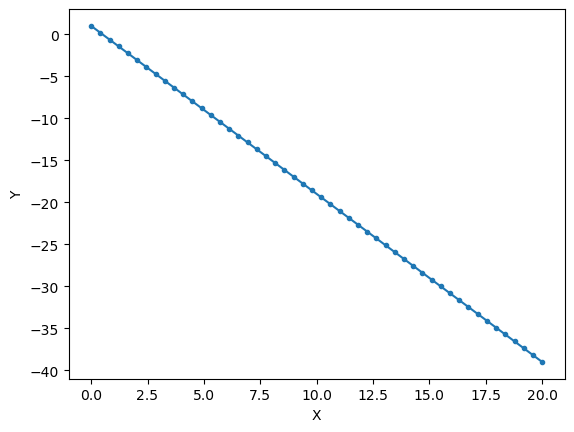

In [33]:
plotting(loss, thetas_0, thetas_1, X, y)

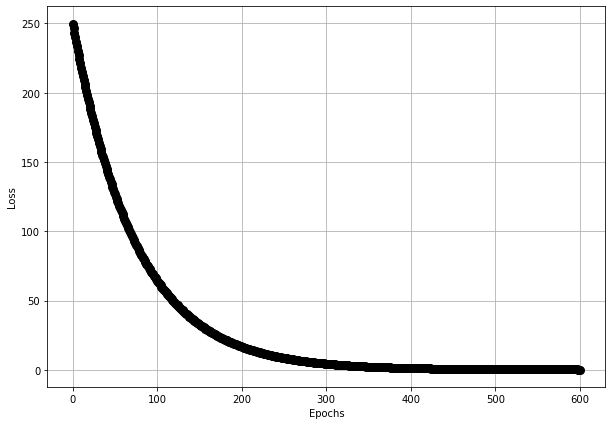

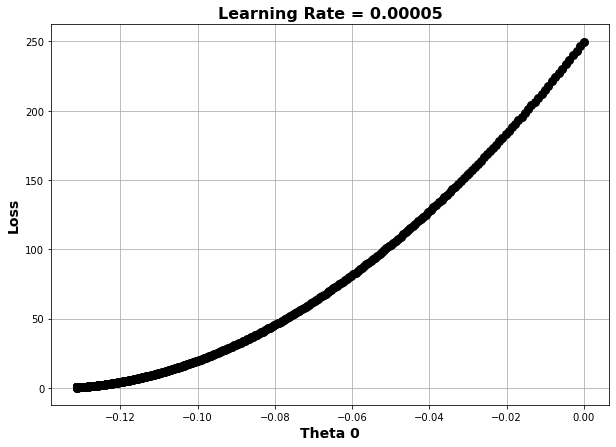

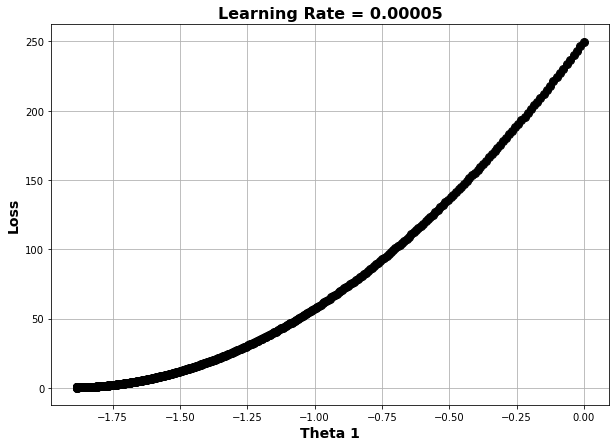

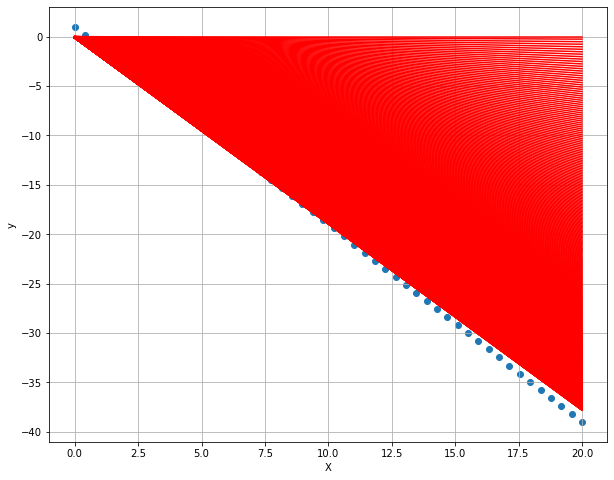

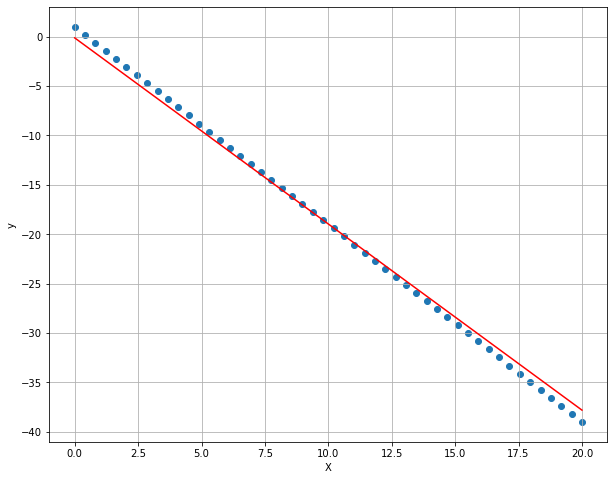

##### The following results uses alpha = 0.005 and max. iterations = 300.

In [35]:
th0, th1, h, thetas_0, thetas_1, loss = gd_singular(X, y, alpha=0.0005, itr=300)

******* Training Report *********

Gradient Descent converged after 300 iterations

Cost= 0.1556989595159684 

Gradient Vector [[-0.28165423]
 [ 0.02095074]] 

Gradient Vector Norm: 0.2824323647742615 

Optimal theta_0: -0.09937905683969758
optimal theta_1: -1.9182239102997845


In [36]:
y_pred = th0 + th1*X
print("r2 score = ", r2_score(y, y_pred))

r2 score =  0.9977566779928114


r2_score: 0.9976200723230484


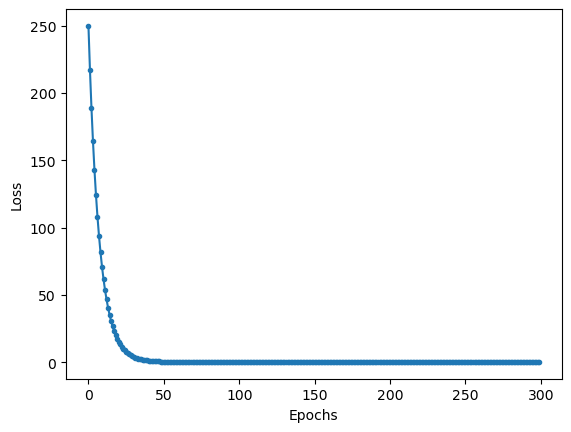

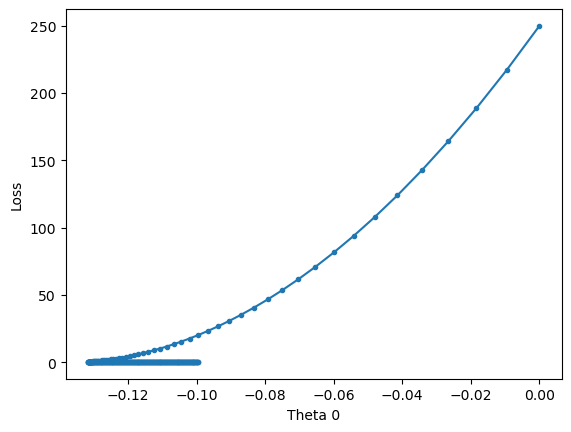

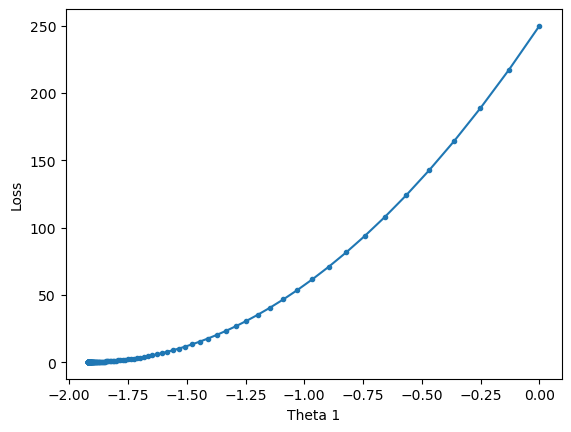

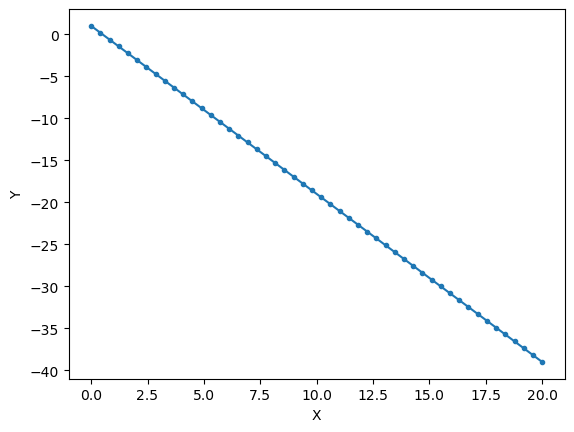

In [37]:
plotting(loss, thetas_0, thetas_1, X, y)

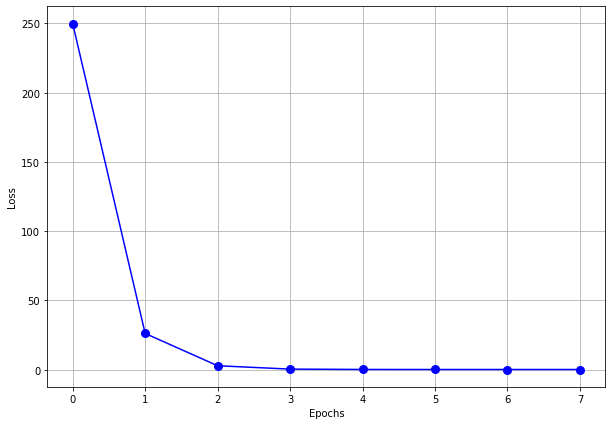

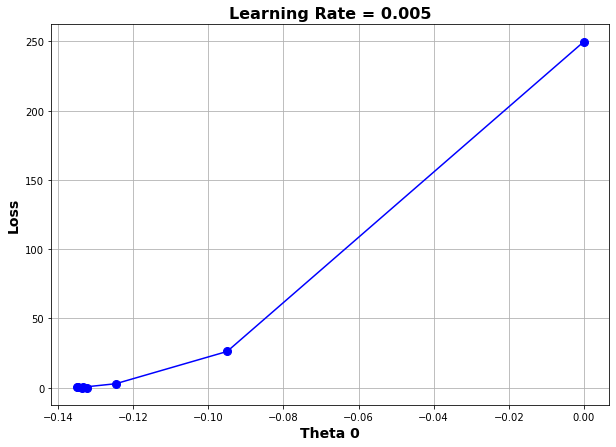

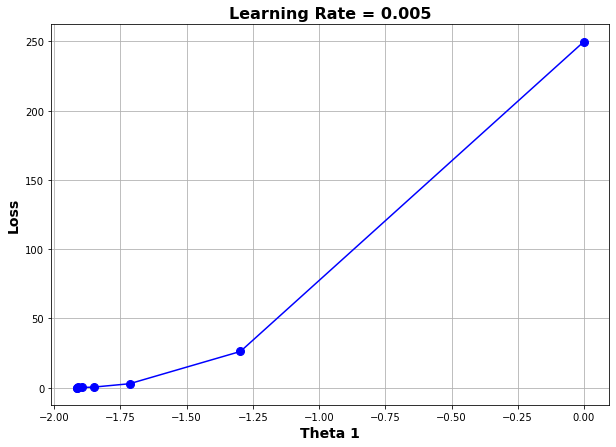

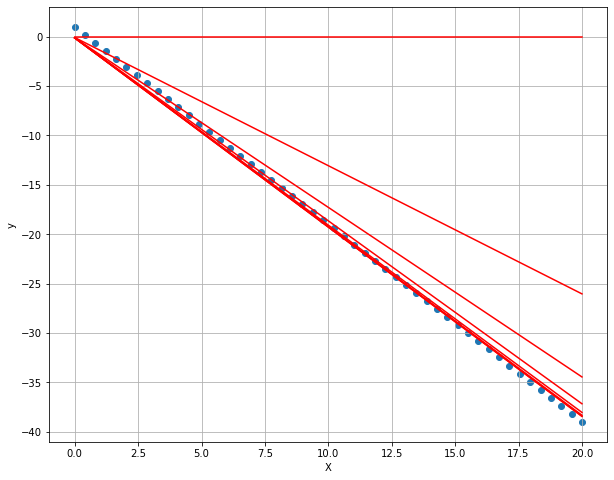

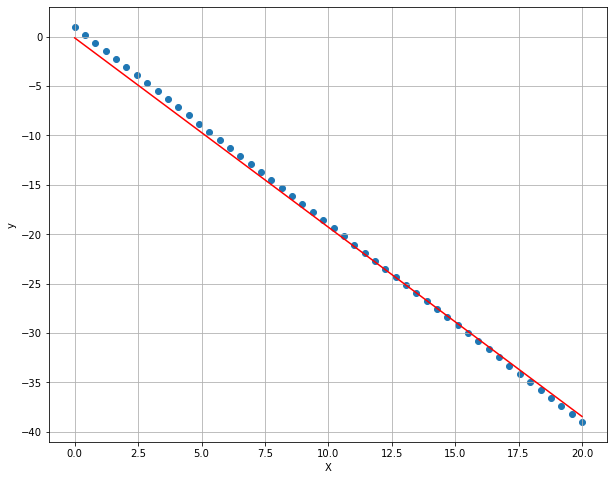

## Stochastic GD

#### Update the implementation of the Batch GD to be Stochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to the Batch GD.
#### Do not forget to shuffle the data.

##### Very Important notes:
- <font color='red'>Save your losses and thetas for each iterations (not each epoch).</font>
- <font color='red'>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</font>
- <font color='red'>Your result may be different from the results shown below due to the randomness of the process. As well as, the random shuffle. The results will be different also for two different run of the algorithm.</font>


In [40]:
from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=0)

In [57]:

def stochastic(X, y, alpha, itr):
    
    th0 = 0
    th1 = 0
    loss = []
    thetas_0 = thetas_1 = []
    
    for i in range(0, itr):
        for j in range(0, len(X)):
        
            thetas_0.append(th0)
            thetas_1.append(th1)

            h = th0 + th1*X[j]
            e = (h - y[j])
            j = e**2/2
            
            loss.append(j)

            #grdient
            j_theta_0 = e
            j_theta_1 = X[j]*e
            
            th0 = th0 - (alpha*j_theta_0)
            th1 = th1 - (alpha*j_theta_1)

        gradient_vec = np.array([[j_theta_0],[j_theta_1]])
        norm = np.linalg.norm(gradient_vec)       

        if i>0 and abs(loss[(i-1)*len(X)]-loss[i*len(X)]) <= 0.001:
            return th0, th1,h,thetas_0, thetas_1, loss
        if(norm <= 0.001): 
            return th0, th1,h,thetas_0,thetas_1,loss
        if(i == itr-1):
                return th0, th1,h,thetas_0,thetas_1,loss


##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [58]:
th0, th1,h,thetas_0,thetas_1,loss = stochastic(X, y, alpha=0.0005, itr = 300)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

r2_score: 0.9976768960178554


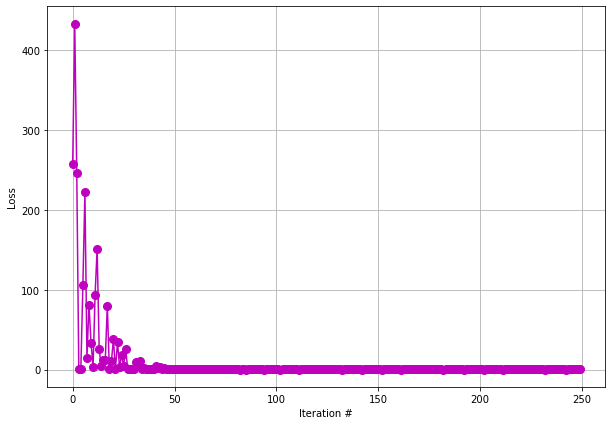

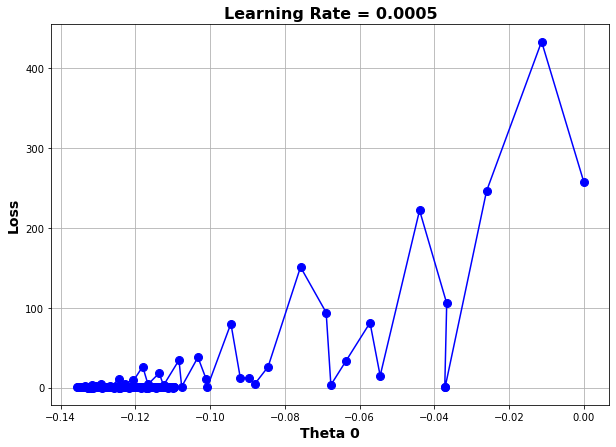

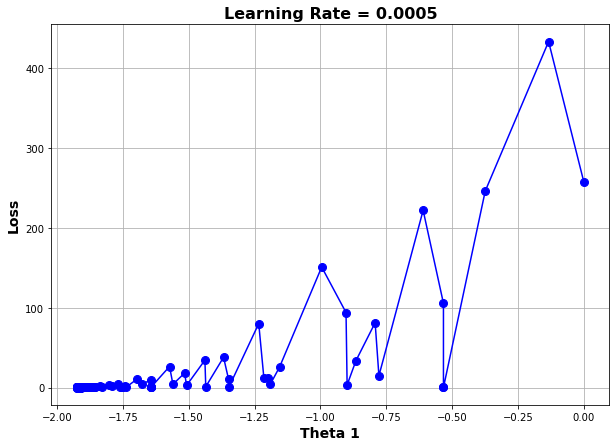

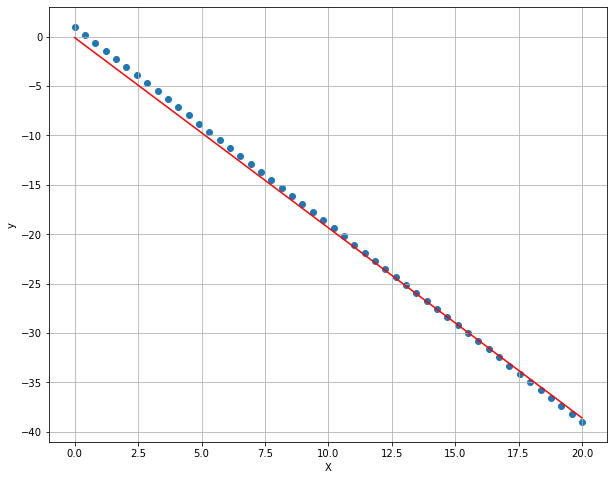

##### The following results uses alpha = 0.0001 and max. iterations = 300.

r2_score =  0.9976210193556192


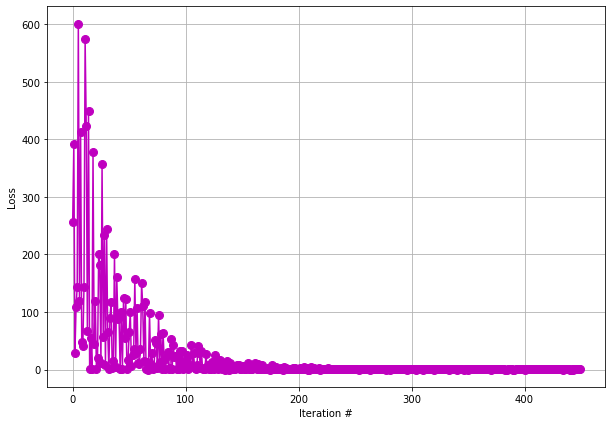

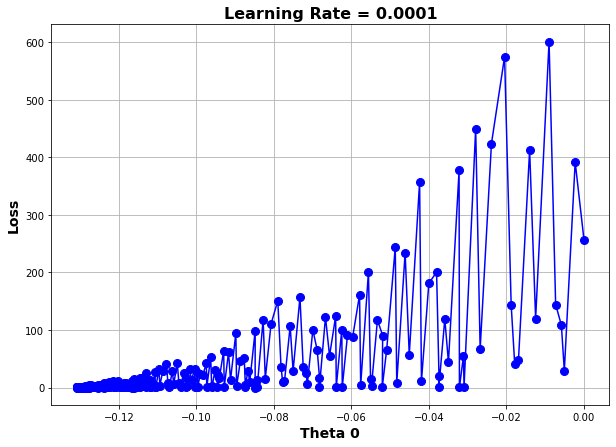

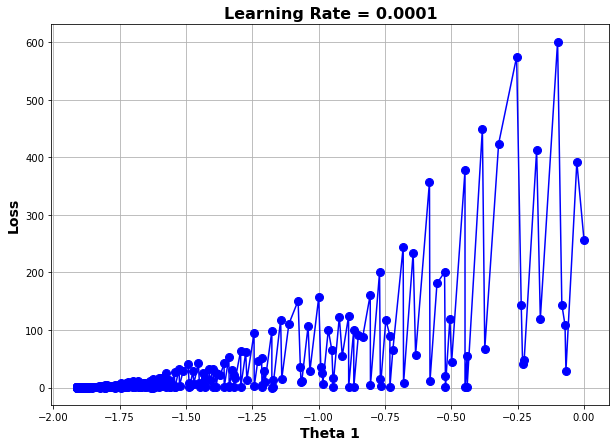

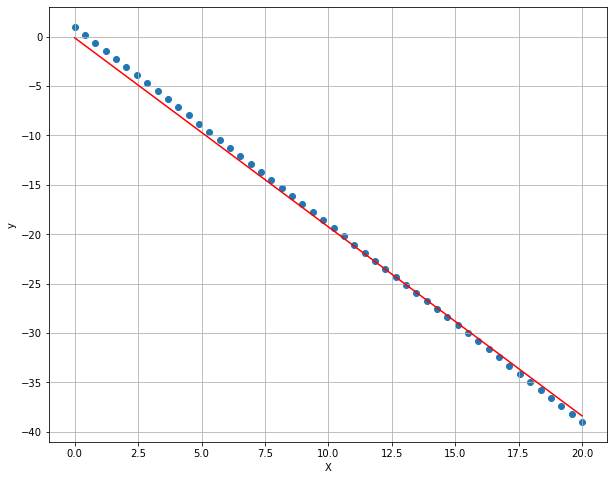

##### The following results uses alpha = 0.00007 and max. iterations = 300.

r2_score =  0.997655146572521


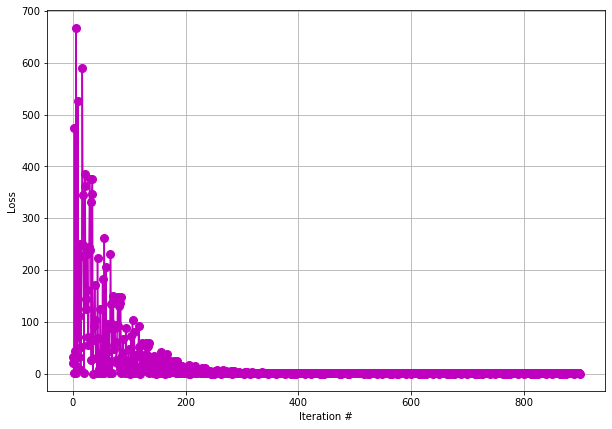

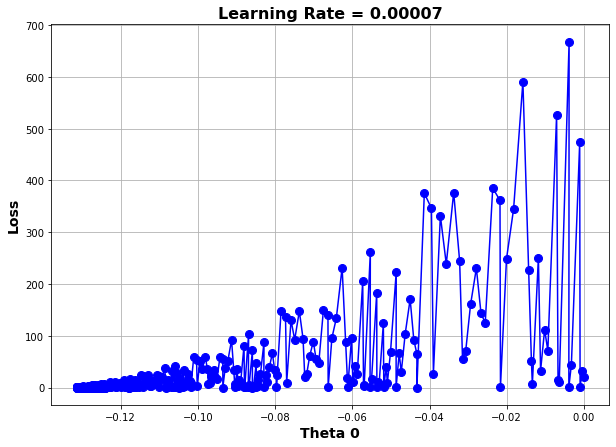

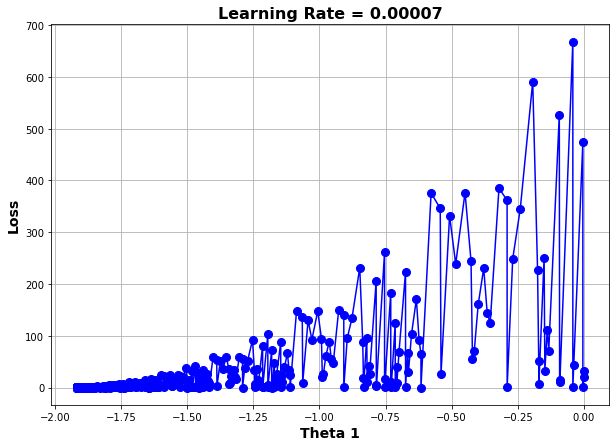

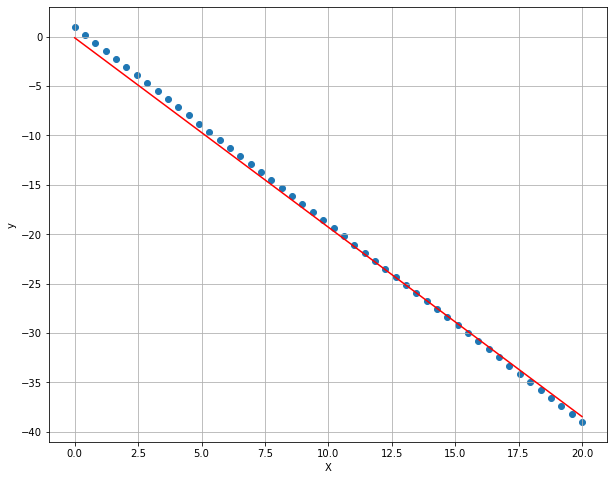

## Mini-Batch GD

#### Update the implementation of the Batch GD to be Mini-Batch and repeat the above plots and evaluations
#### Change batch size and see the effect
#### Do not forget to shuffle the data

##### Very Important notes:
- <font color='red'>Save your losses and thetas for each iterations (not each epoch).</font>
- <font color='red'>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</font>
-<font color='red'>Your result may be different from the results shown below due to the randomness of the process. As well as, the random shuffle. The results will be different also for two different run of the algorithm.</font>

In [50]:
from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=0)

In [48]:

def mini_batch(X, y, alpha, itr, batch):
    
    th0 = 0
    th1 = 0
    loss = []
    thetas_0 = []
    thetas_1 = []
    epochs=int(len(X)/batch)
    
    for i in range(0,itr):
        for j in range(0,epochs):
        
            thetas_0.append(th0)
            thetas_1.append(th1)
            
            X_b=X[j*batch: (j*batch)+batch]
            y_b=y[j*batch:(j*batch)+batch]

            h = th0 + th1*X_b
            e = (h - y_b)
            j = 1/(2*len(X_b))*(e@e)
            
            loss.append(j)

            #grdient
            j_theta_0 = 1/(len(X_b))*(e.sum())
            j_theta_1 = 1/(len(X_b))*(e@X_b).sum()
            
            th0 = th0 - (alpha*j_theta_0)
            th1 = th1 - (alpha*j_theta_1)

    gradient_vec = np.array([[j_theta_0],[j_theta_1]])
    norm = np.linalg.norm(gradient_vec)       
    
    if i>0 and abs(loss[(i-1)*epochs]-loss[i*epochs])<=0.1:
        return th0, th1,h,thetas_0, thetas_1, loss
    if(norm <= 0.001): 
        return th0, th1,h,thetas_0,thetas_1,loss
    if(i == itr-1):
            return th0, th1,h,thetas_0,thetas_1,loss


In [49]:
th0, th1, h, thetas_0, thetas_1, loss = mini_batch(X, y, alpha=0.0005, itr=300, batch=5)

##### The following results uses batch size=5, alpha = 0.0005 and max. iterations = 300.

****************** Epoch 0 ********************

Cost = 4.756947839402018

Gradient Vector:
[[ 8.22967595]
 [96.72704965]]

Gradient Vector Norm:
97.07651466963269

theta_0_new : -0.06646182531835047
theta_1_new : -0.9256821913217486

****************** Epoch 1 ********************

Cost = 1.122060441600775

Gradient Vector:
[[ 3.83507638]
 [46.73760466]]

Gradient Vector Norm:
46.89468519790215

theta_0_new : -0.10259516119797818
theta_1_new : -1.4293728638220262

****************** Epoch 2 ********************

Cost = 0.2643644845972613

Gradient Vector:
[[ 1.67586431]
 [22.1741011 ]]

Gradient Vector Norm:
22.23733978351637

theta_0_new : -0.11960676915575022
theta_1_new : -1.6769384840774493

****************** Epoch 3 ********************

Cost = 0.06706361377523971

Gradient Vector:
[[ 0.61510837]
 [10.10475679]]

Gradient Vector Norm:
10.12346127220413

theta_0_new : -0.12722302765329713
theta_1_new : -1.7986456643566977

****************** Epoch 4 ********************

Cost = 0

In [22]:
from sklearn.metrics import r2_score

In [46]:
y_pred= th0 + th1*X
r2_score(y,y_pred)

0.9988751545268555

r2_score 0.9974493632266231


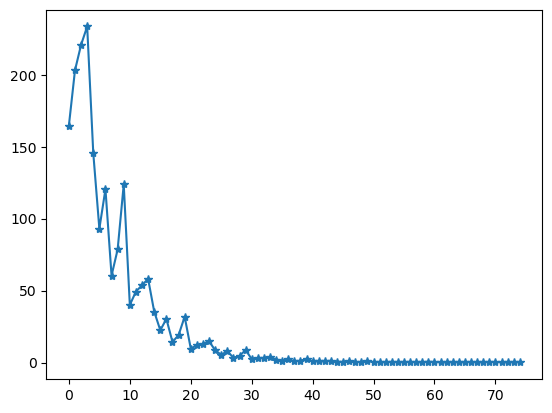

In [74]:
plt.plot(loss[:75],'*-')

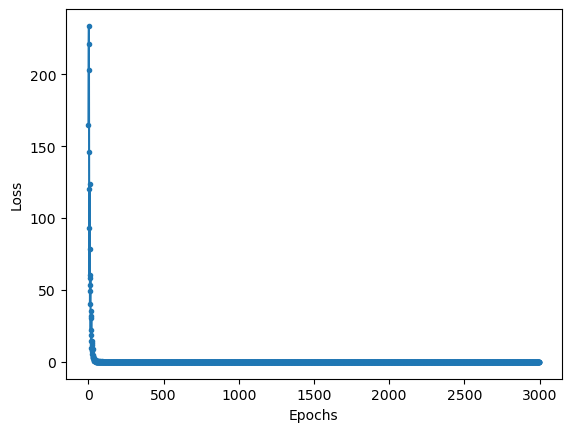

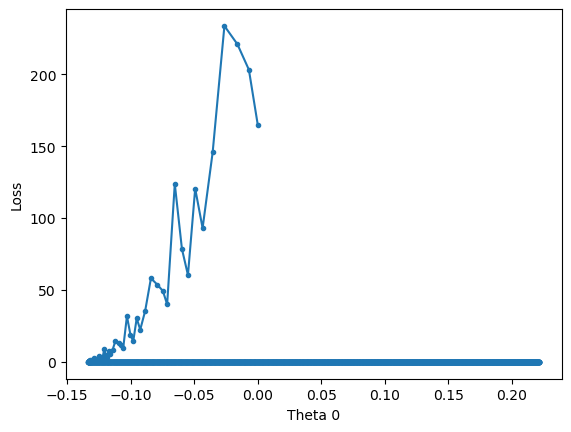

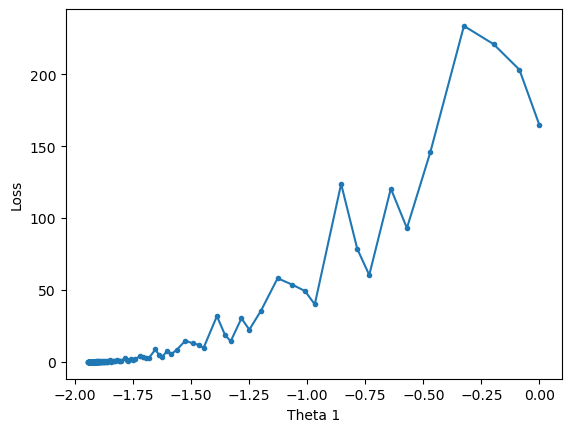

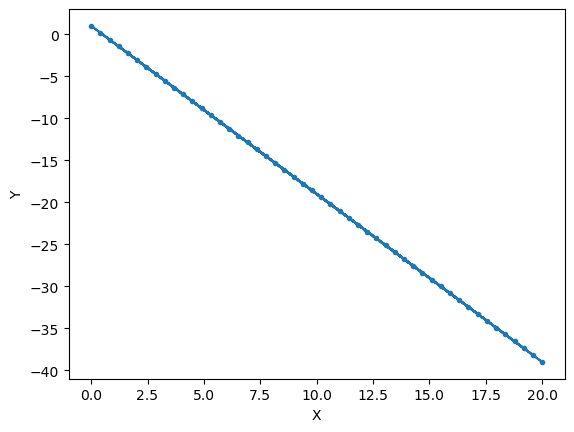

In [50]:
plotting(loss, thetas_0, thetas_1, X, y)

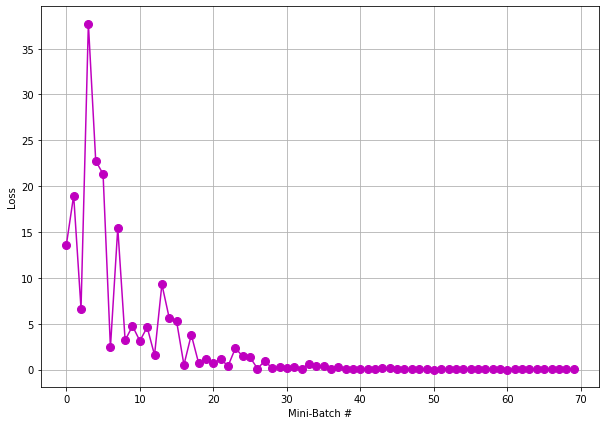

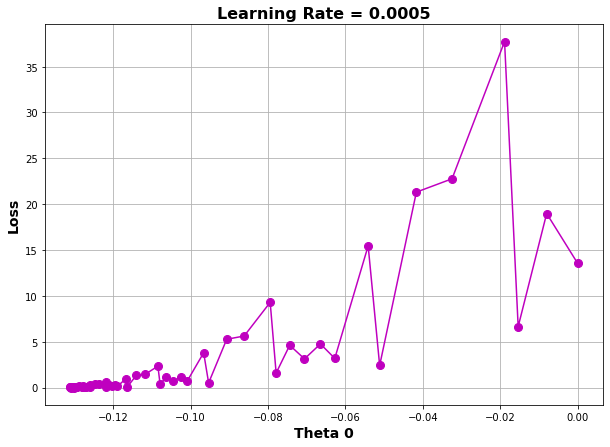

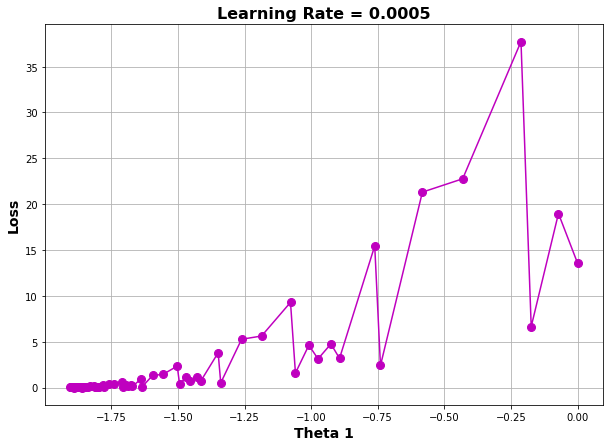

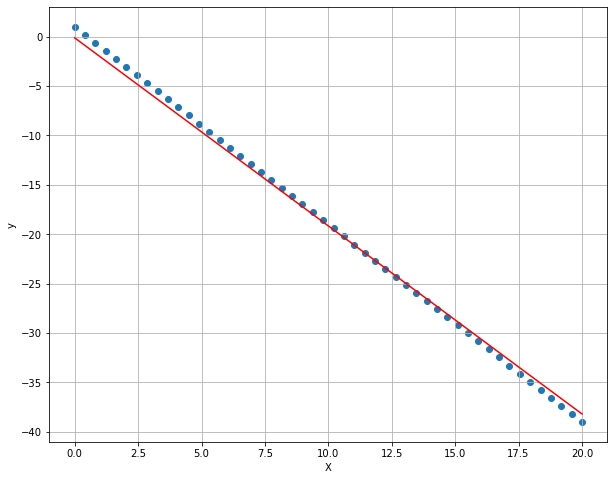

##### The following results uses batch size=10, alpha = 0.0005 and max. iterations = 300.

In [51]:
th0, th1, h, thetas_0, thetas_1, loss = mini_batch(X, y, alpha=0.0005, itr=300, batch=10)

In [52]:
y_pred= th0 + th1*X
r2_score(y,y_pred)

0.9983485172994209

r2_score 0.9976302004574656


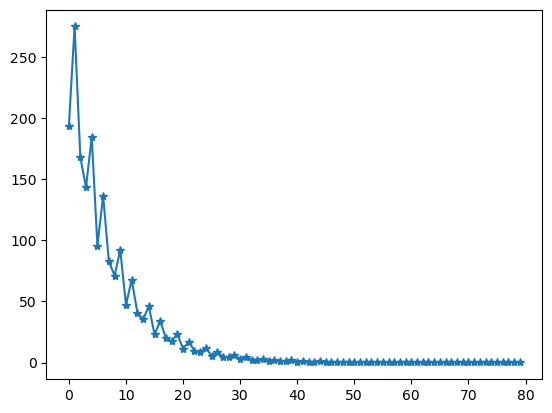

In [63]:
plt.plot(loss[:80], '*-')

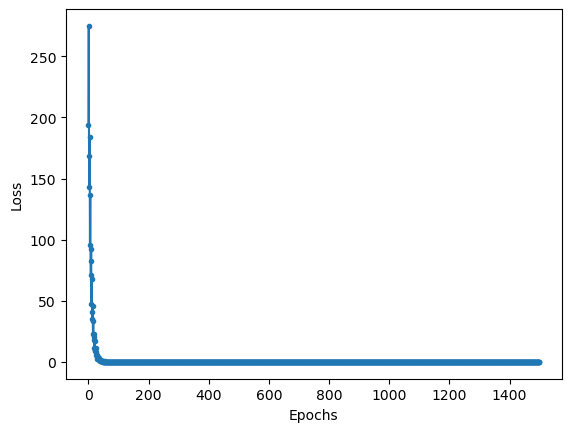

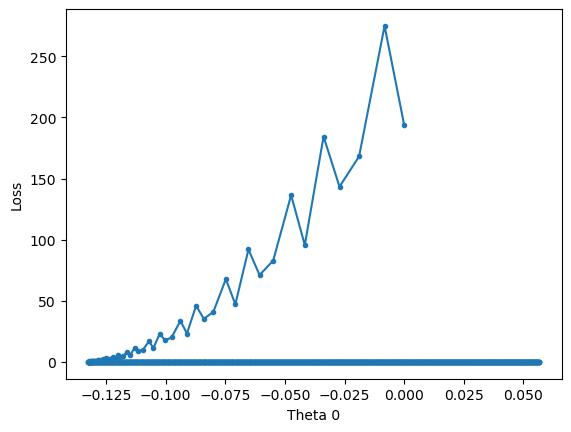

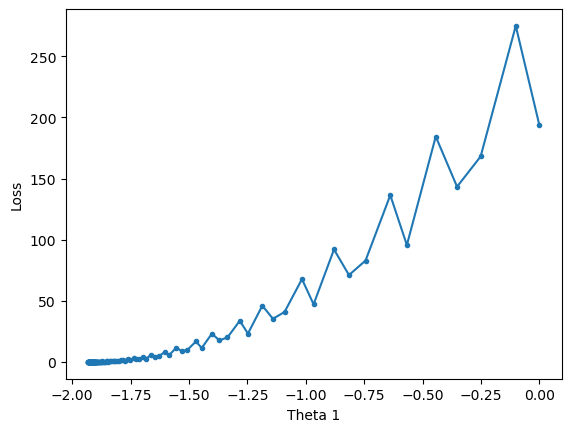

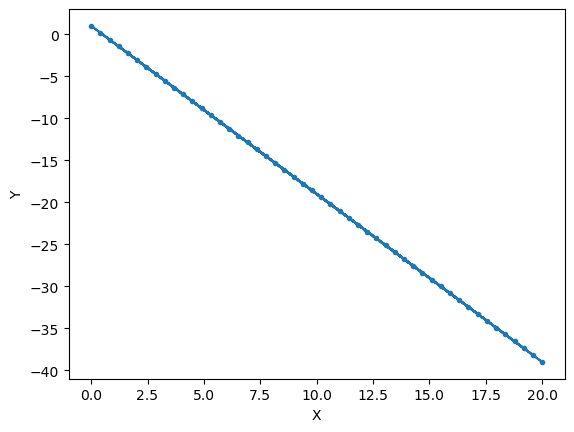

In [53]:
plotting(loss, thetas_0, thetas_1, X, y)

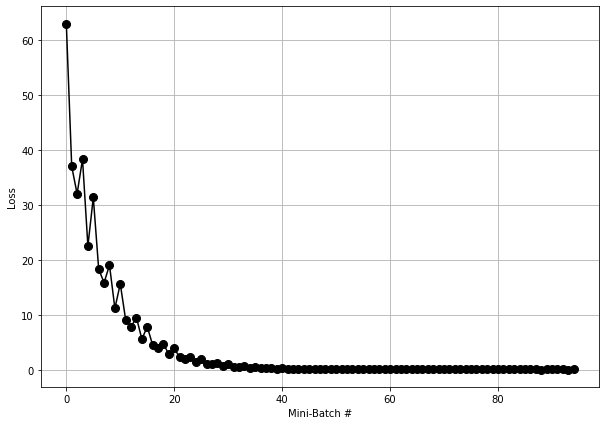

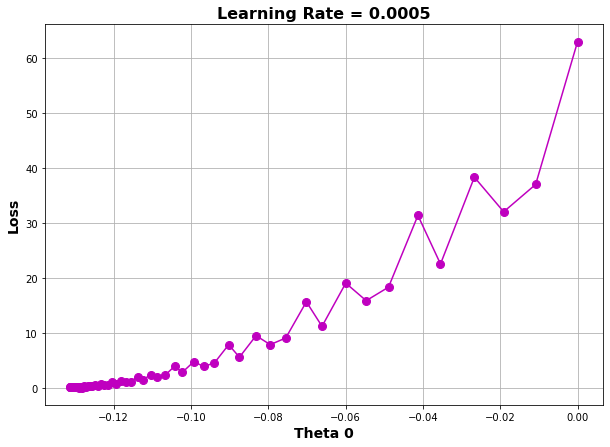

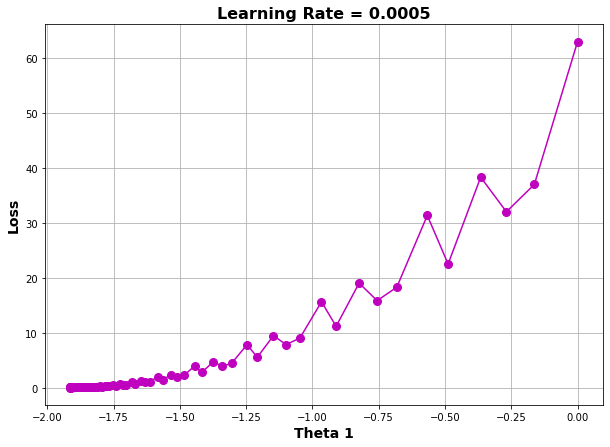

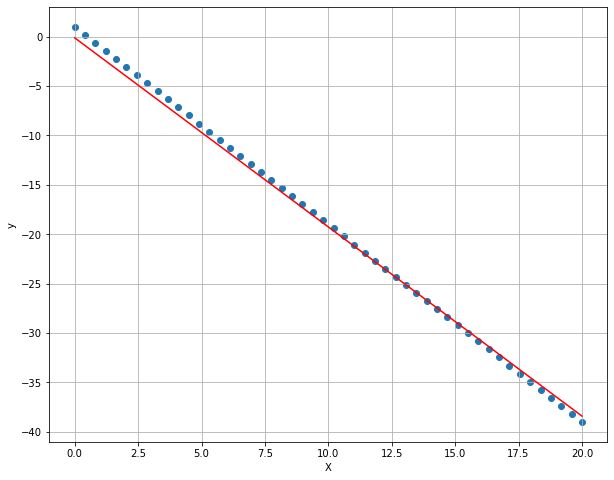

##### The following results uses batch size=20, alpha = 0.0005 and max. iterations = 300.

In [54]:
th0, th1, h, thetas_0, thetas_1, loss = mini_batch(X, y, alpha=0.0005, itr=300, batch=20)

In [55]:
y_pred= th0 + th1*X
r2_score(y,y_pred)

0.997871077959887

r2_score 0.9975575226128095


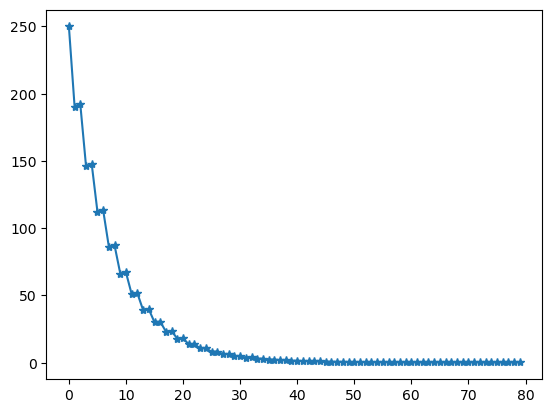

In [68]:
plt.plot(loss[:80], '*-')

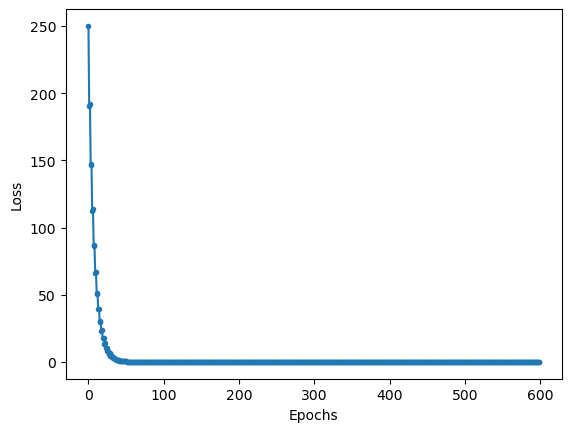

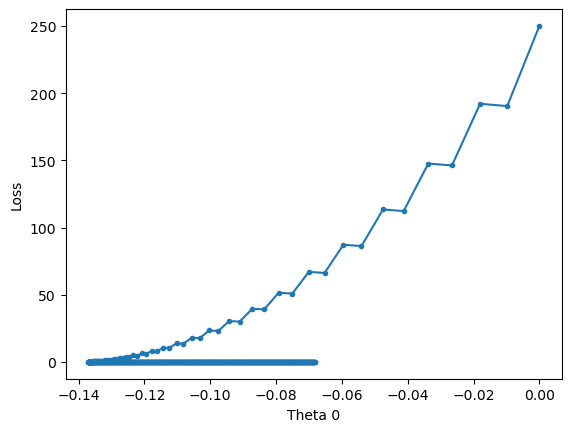

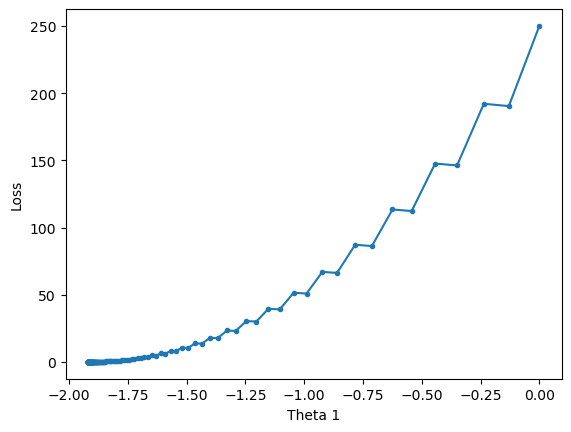

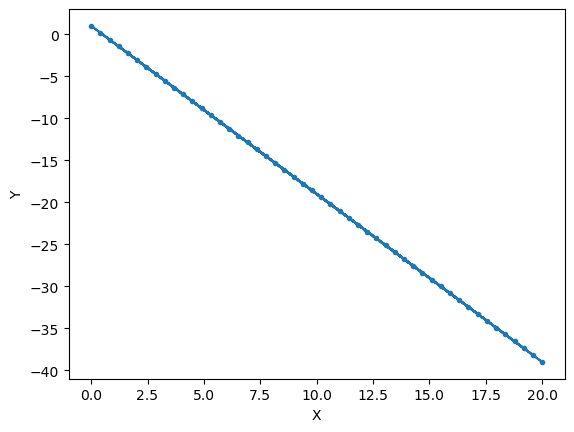

In [56]:
plotting(loss, thetas_0, thetas_1, X, y)

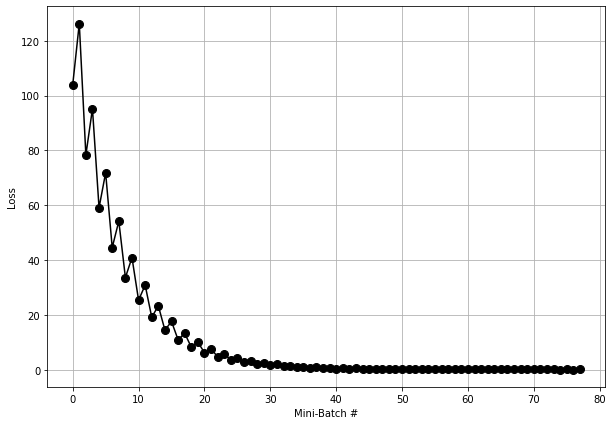

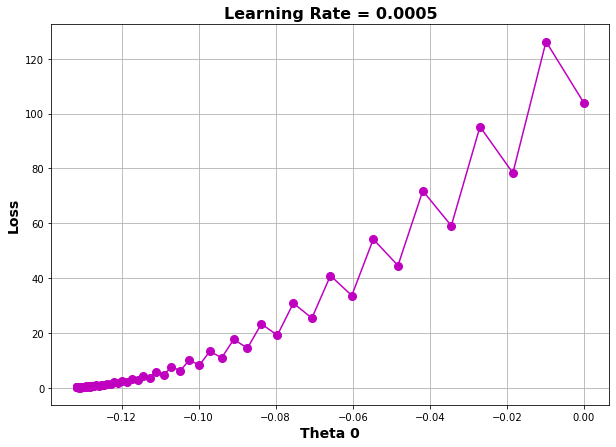

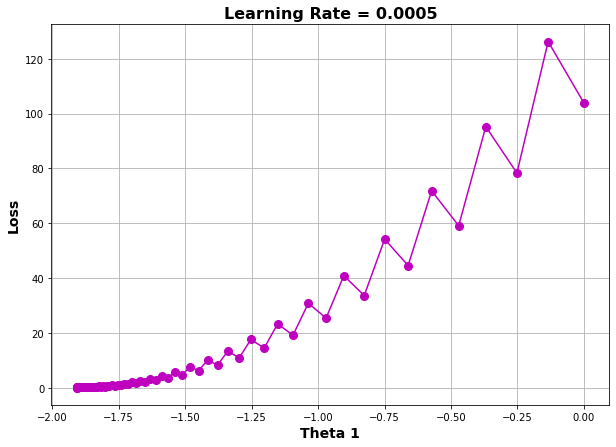

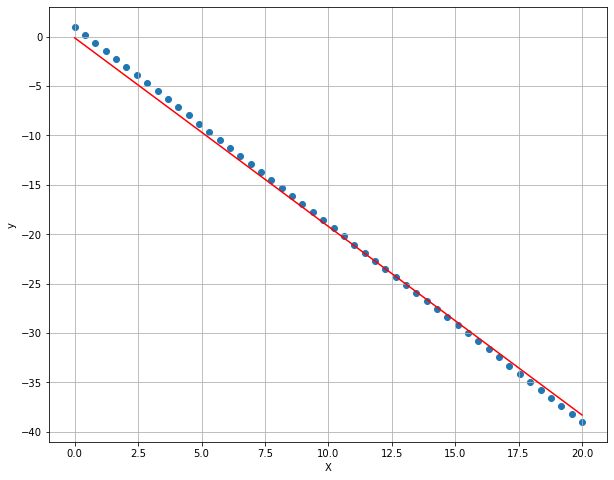